# Demonstration

In [1]:
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_path = "./img/E.coil.png"

***

In [3]:
from PIL import Image

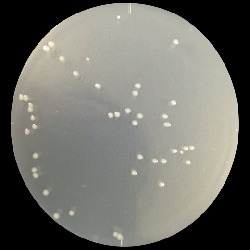

In [4]:
# Visualize image.
Image.open(img_path).resize((250,250))

***

## Approach 1: threshold
If we use a global value as threshold value, it will be strongly influenced by the shooting environment, so I use <b>different thresholds for different regions of the same image.</b> It gives us better results for images with varying illumination.

### Use `adaptiveThreshold` method.

| params          | role                                                                                 |
|:--------------- |:------------------------------------------------------------------------------------ |
| Adaptive Method | `cv.ADAPTIVE_THRESH_MEAN_C` or `cv.ADAPTIVE_THRESH_GAUSSIAN_C`                       |
| Block Size      | It decides the size of neighbourhood area. (MUST A ODD NUMBER)                       |
| C               | It is just a constant which is subtracted from the mean or weighted mean calculated. |

| Adaptive Method                     | How to calcurate the threshold value.                                                                                             |
| :------------------------------ | :----------------------------------------------------------------------------------------------- |
| `cv.ADAPTIVE_THRESH_MEAN_C`     | threshold value is the mean of neighbourhood area.                                               |
| `cv.ADAPTIVE_THRESH_GAUSSIAN_C` | threshold value is the weighted sum of neighbourhood values where weights are a gaussian window. |

In [5]:
out_path_format = "./img/E.coil_{}.png"

In [6]:
img = cv2.imread(img_path)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [8]:
th = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 9, C=2)

In [9]:
nLabels, labelImage = cv2.connectedComponents(th)

In [10]:
print("N of E.coils: {}".format(nLabels))

N of E.coils: 45


In [11]:
height, width, channels = img.shape

In [12]:
print("height  : {}".format(height))
print("width   : {}".format(width))
print("channels: {}".format(channels))

height  : 520
width   : 520
channels: 3


In [13]:
dst = copy.copy(img)

In [14]:
colors = []
for i in range(nLabels):
    colors.append(np.random.randint(0, 255,3))

In [15]:
for y in range(height):
    for x in range(width):
        if labelImage[y, x] > 0:
            dst[y, x] = colors[labelImage[y, x]]
        else:
            dst[y, x] = [0, 0, 0]

In [16]:
cv2.imwrite(out_path_format.format(nLabels), dst)

True

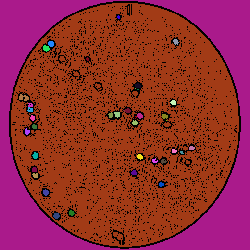

In [17]:
Image.open(out_path_format.format(nLabels)).resize((250,250))

***
***

## Approach 2: K-means
Apply image segmentation by K-means to distinguish the E.coil's region or not.
1. Examine E.coil's color(BGR) in the image (I used "Digital Color Meter.").
2. Apply K-means segmentation to the image.
3. Change the cluster's color closest to the E.colis' to white, and the others' to black.
4. Distinguish E.coils or not.

In [18]:
import numpy as np
import cv2
from sklearn.cluster import KMeans

In [19]:
K = 15

In [20]:
out_path_format = "./img/E.coil_{}-means.png".format(K)

In [21]:
img = cv2.imread(img_path)

In [22]:
img_shape = img.shape

In [23]:
x = img.reshape(-1, 3).astype(float)

In [24]:
model = KMeans(n_clusters = K)

In [25]:
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
cls = model.predict(x)

In [27]:
for k in range(K):
    x[cls == k] = np.average(x[cls == k], axis = 0)

In [28]:
seg_img = x.astype(int).reshape(img_shape)

In [29]:
cv2.imwrite(out_path_format, seg_img)

True

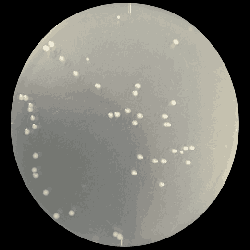

In [30]:
Image.open(out_path_format).resize((250,250))

***

### Change to binary image

In [31]:
out_path_format = "./img/E.coil_{}-means_binary.png".format(K)

In [32]:
R,G,B = (222,219,203) # Digital Color Meter

In [33]:
BGR = [B,G,R]

In [34]:
mu_colors = np.array([]).reshape(-1,3)
for k in range(K):
    mu_colors = np.vstack([mu_colors, np.average(x[cls == k], axis = 0)])

In [35]:
k_e = np.argmin(np.sum(abs((mu_colors - BGR) * 2), axis=1))

In [36]:
for k in range(K):
    if k == k_e:
        x[cls == k] = [255,255,255]
    else:
        x[cls == k] = [0,0,0]

In [37]:
bi_img = x.astype(int).reshape(img_shape)

In [38]:
type(bi_img)

numpy.ndarray

In [39]:
cv2.imwrite("img/{}-means-tmp-E.coil.png".format(K), bi_img)

True

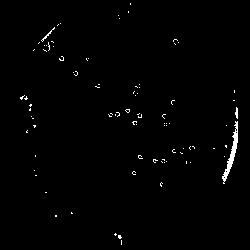

In [40]:
Image.open("img/{}-means-tmp-E.coil.png".format(K)).resize((250,250))

In [41]:
bi_img.shape

(520, 520, 3)

****

### Paint

In [42]:
bi_img = cv2.imread("img/{}-means-tmp-E.coil.png".format(K))

In [43]:
gray = cv2.cvtColor(bi_img, cv2.COLOR_BGR2GRAY)

In [44]:
nLabels, labelImage = cv2.connectedComponents(gray)

In [45]:
nLabels

108

In [46]:
dst = copy.copy(img)

In [47]:
colors = []
for i in range(nLabels):
    colors.append(np.random.randint(0, 255,3))

In [48]:
for y in range(height):
    for x in range(width):
        if labelImage[y, x] > 0:
            dst[y, x] = colors[labelImage[y, x]]
        else:
            dst[y, x] = [0, 0, 0]

In [49]:
cv2.imwrite("d.png", dst)

True

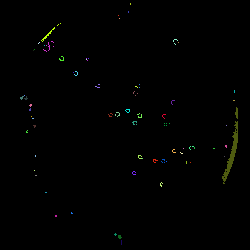

In [50]:
Image.open("d.png").resize((250,250))